In [2]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FS=0.00366772681
f1=(1+FS)*5
f2=(1+FS)*3
f3=(1+FS)*2
FUNCTION_SHASTOTA=(1+FS)*3 # положительное значение
FUNCTION_SDVIG_FAZY=1


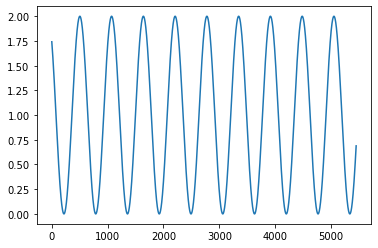

In [9]:
def a(x): # функция синуса
    return(np.sin(x*FUNCTION_SHASTOTA+FUNCTION_SDVIG_FAZY)+1)

def b(chastota): # функция дискретизации
    sas=np.array([])
    for i in np.arange(-10,10,chastota):
        sas=np.append(sas,a(i))
    return sas

def draw(chastota):# вывод графика дискретизированной функции
    fig = plt.subplots()
    y=b(chastota)
    x = np.arange(0, len(y), 1)
    
    plt.plot(x, y[x])
    plt.show()

draw(FS)


In [155]:


def c(filename, values): # создание изображения по дискретизированной функции
    size=len(values)
    img = Image.new('L', (size,size), color = 'black')
    d = ImageDraw.Draw(img)
    for x in range(size-1):
        top=(x, 0)
        bottom=(x, size)
        line_color=round((values[x]+1)/2*255)
        d.line([top, bottom], fill=line_color, width=1)
    
    img.save(filename)

c("14.jpg", b(FS))